### traj_5400-5430_0006753631-49NZ20071008

** packages **

In [1]:
from ctd2xray import cchdo
from mpl_toolkits.basemap import Basemap
from pymongo import MongoClient
import gsw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
%matplotlib inline

** traj_5400-5430_0006753631 **

Oct. 15, 2007 - Nov. 14, 2007

In [2]:
rcs_eddies = MongoClient().eddies.rcs_eddies

In [3]:
eddy_code = 'traj_5400-5430_0006753631'

In [4]:
eddy_rclv = rcs_eddies.find_one({'_id': eddy_code})

In [5]:
eddy_traj = eddy_rclv['features'][2]['geometry']['coordinates']

In [6]:
obs_num = len(eddy_traj)

In [7]:
lon_eddy = np.zeros(obs_num)
lat_eddy = np.zeros(obs_num)

In [8]:
for i in range(obs_num):
    lon_eddy[i] = eddy_traj[i][0]
    lat_eddy[i] = eddy_traj[i][1]

** 49NZ20071008 **

Oct. 08, 2007 - Dec. 26, 2007

In [9]:
cchdo_ctd = MongoClient().eddies.cchdo_ctd

In [10]:
expo_code = '49NZ20071008'

In [11]:
cas_num = cchdo_ctd.find({'expocode': expo_code}).count()

In [12]:
lon_expo = np.zeros(cas_num)
lat_expo = np.zeros(cas_num)

In [13]:
# longitude range setting
# from 0 to 360
def format(longitude):
    if longitude > 0:
        longitude = longitude
    else:
        longitude = longitude + 360
    return longitude

In [14]:
i = 0
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    lon_expo[i] = format(expo['location']['coordinates'][0])
    lat_expo[i] = expo['location']['coordinates'][1]
    i = i+1

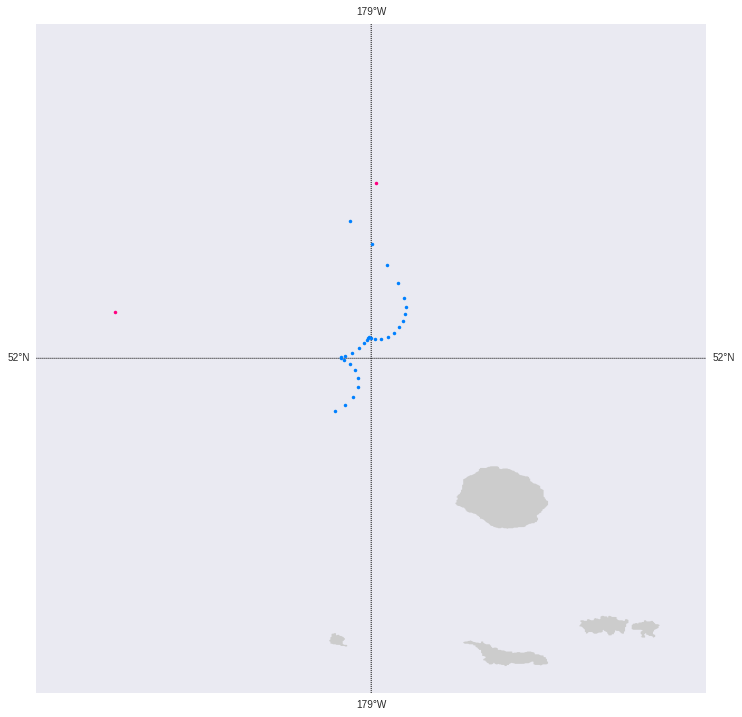

In [15]:
plt.rcParams['figure.figsize'] = (12, 12)
my_map = Basemap(projection='cyl', llcrnrlat=51.5, urcrnrlat=52.5,\
                 llcrnrlon=180.5, urcrnrlon=181.5, resolution='f')
my_map.fillcontinents()
parallels = np.arange(-90, 90, 1)
my_map.drawparallels(parallels, labels=[True,True,True,True])
meridians = np.arange(0, 360, 1)
my_map.drawmeridians(meridians, labels=[True,True,True,True])
x_eddy, y_eddy = my_map(lon_eddy, lat_eddy)
x_expo, y_expo = my_map(lon_expo, lat_expo)
my_map.plot(x_eddy, y_eddy, '.', color='#0080ff')
my_map.plot(x_expo, y_expo, '.', color='#ff0080')
plt.savefig('figures/figure-1/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** temperature-salinity **

In [16]:
target = 16

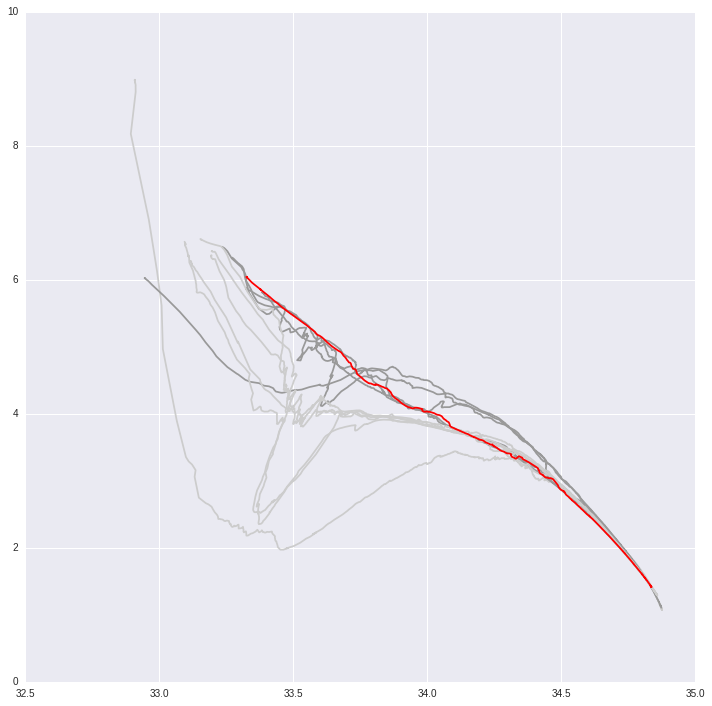

In [17]:
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        LAT = lat
        plt.plot(sa, ct, color='#ff0000', zorder=2)
    elif (target-6) < station < target:
        plt.plot(sa, ct, color='#cccccc', zorder=1)
    elif target < station < (target+6):
        plt.plot(sa, ct, color='#999999', zorder=1)
plt.xlim([32.5, 35])
plt.ylim([0, 10])
plt.rcParams['figure.figsize'] = (12, 12)
plt.savefig('figures/figure-2/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-temperature **

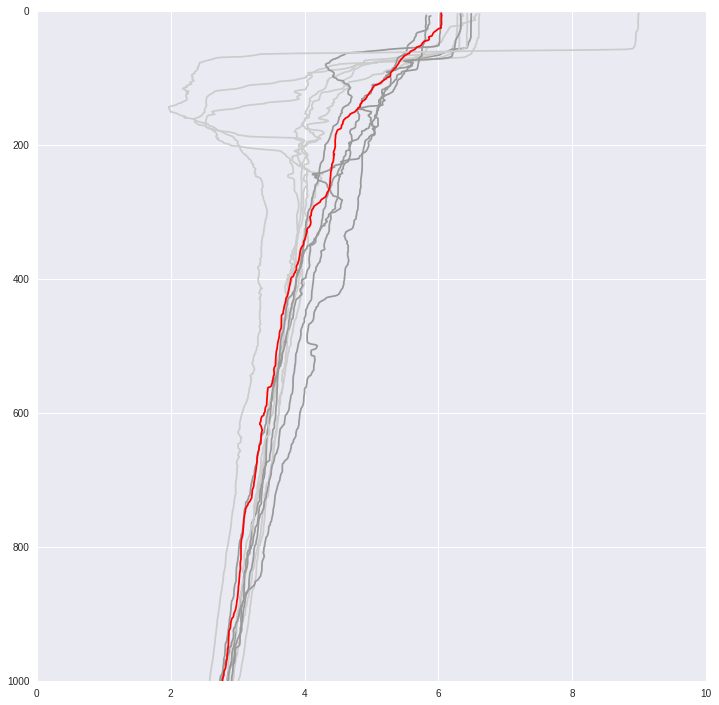

In [18]:
for expo in cchdo_ctd.find({'expocode': expo_code}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        LAT = lat
        plt.plot(ct, p, color='#ff0000', zorder=2)
    elif (target-6) < station < target:
        plt.plot(ct, p, color='#cccccc', zorder=1)
    elif target < station < (target+6):
        plt.plot(ct, p, color='#999999', zorder=1)
plt.xlim([0, 10])
plt.ylim([1000, 0])
plt.rcParams['figure.figsize'] = (12, 12)
plt.savefig('figures/figure-3/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-salinity **

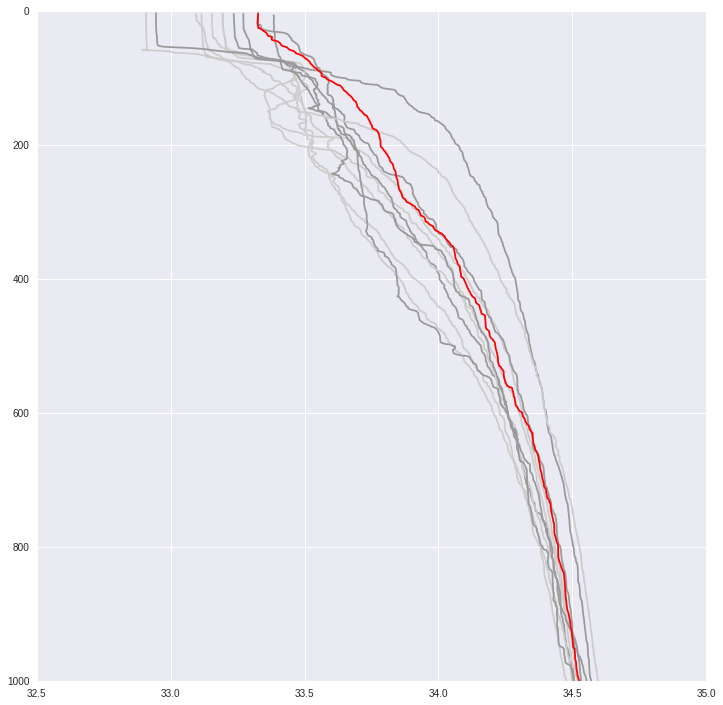

In [19]:
for expo in cchdo_ctd.find({'expocode': expo_code}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        LAT = lat
        plt.plot(sa, p, color='#ff0000', zorder=2)
    elif (target-6) < station < target:
        plt.plot(sa, p, color='#cccccc', zorder=1)
    elif target < station < (target+6):
        plt.plot(sa, p, color='#999999', zorder=1)
plt.xlim([32.5, 35])
plt.ylim([1000, 0])
plt.rcParams['figure.figsize'] = (12, 12)
plt.savefig('figures/figure-4/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-oxygen **

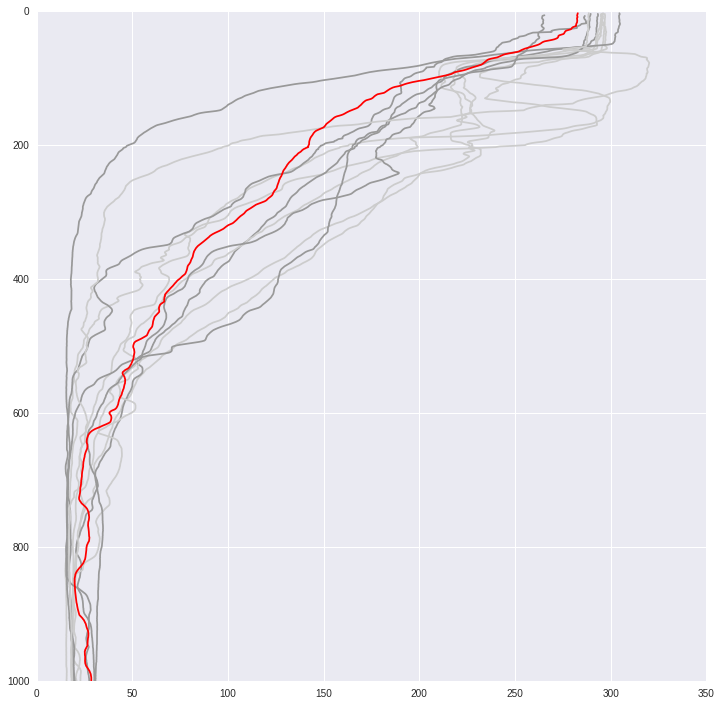

In [20]:
for expo in cchdo_ctd.find({'expocode': expo_code}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        LAT = lat
        plt.plot(o, p, color='#ff0000', zorder=2)
    elif (target-6) < station < target:
        plt.plot(o, p, color='#cccccc', zorder=1)
    elif target < station < (target+6):
        plt.plot(o, p, color='#999999', zorder=1)
plt.xlim([0, 350])
plt.ylim([1000, 0])
plt.rcParams['figure.figsize'] = (12, 12)
plt.savefig('figures/figure-5/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** contours **

In [21]:
path_list = '/home/cz2397/data/cchdo-ctd/201_p14_49NZ20071008_nc_ctd/p14n_*'

In [22]:
pressure = np.linspace(0, 6000, num=6001, endpoint=True)

In [23]:
ds_tim = cchdo.open_cchdo_as_mfdataset(path_list, pressure)

In [24]:
ds_lat = ds_tim.swap_dims({'time': 'latitude'})

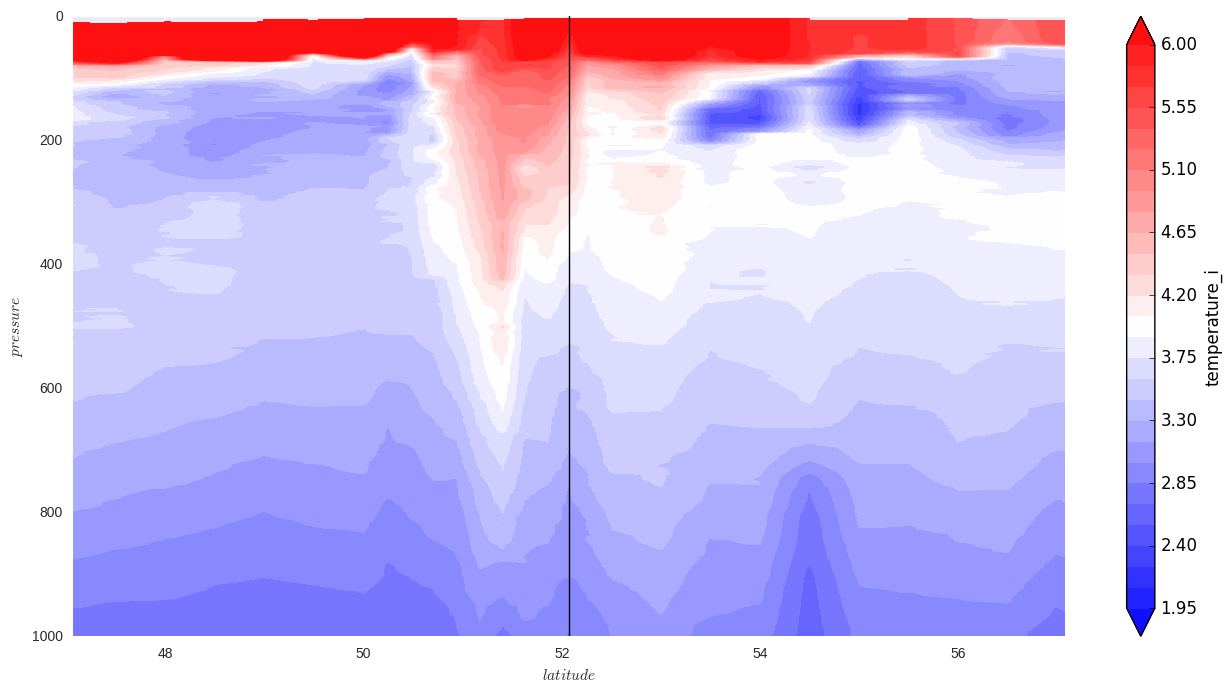

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
ds_lat.temperature_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                     vmin=2, vmax=6, levels=40)
plt.xlim([LAT-5, LAT+5])
plt.ylim([1000, 0])
plt.axvline(LAT, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')
plt.savefig('figures/figure-6/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

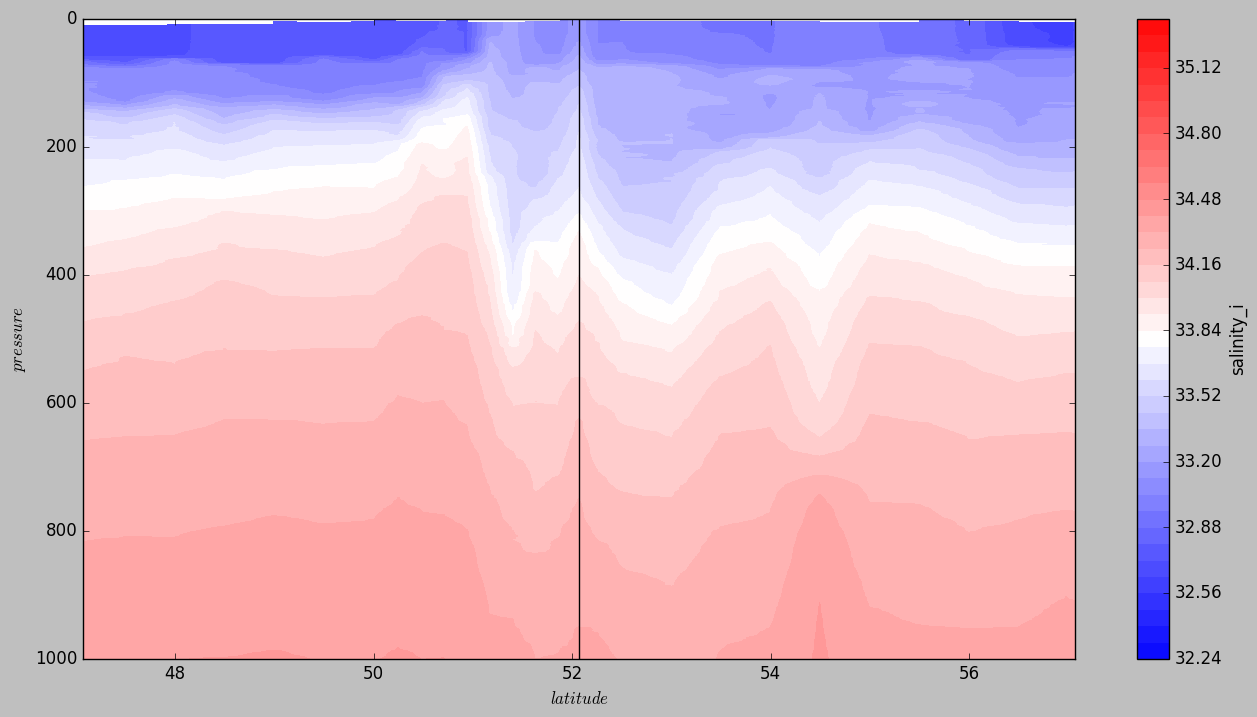

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))
ds_lat.salinity_i.T.plot.contourf(yincrease=False, ax=ax, levels=40, cmap='bwr')
plt.xlim([LAT-5, LAT+5])
plt.ylim([1000, 0])
plt.axvline(LAT, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')
plt.savefig('figures/figure-7/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

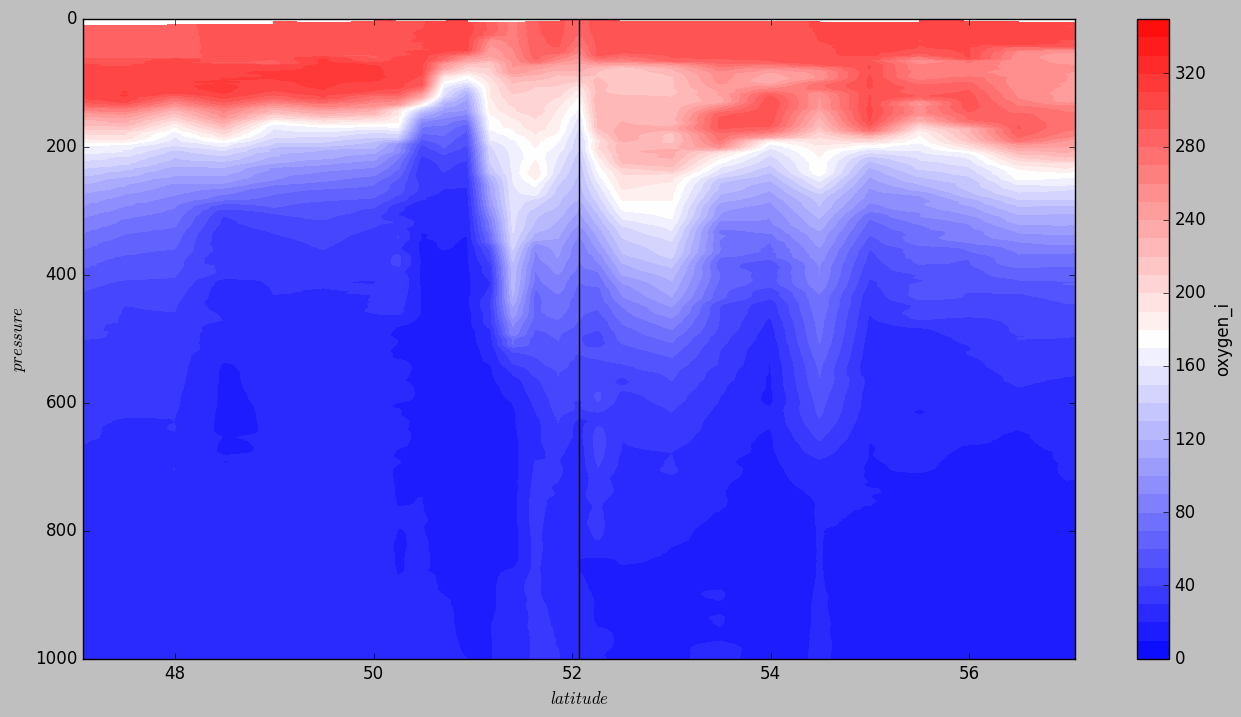

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
ds_lat.oxygen_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                vmin=0, vmax=350, levels=40)
plt.xlim([LAT-5, LAT+5])
plt.ylim([1000, 0])
plt.axvline(LAT, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')
plt.savefig('figures/figure-8/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()